# Time Series Analysis of Steinhoff.

<h3>The rumours, the reveal and the aftermath.</h3>

I will start with data exploration.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
import numpy as np
import datetime as dt
import statsmodels.graphics.tsaplots as sgt
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
stein = pd.read_csv('/home/slyson/Documents/Data Science/Projects/Datasets/Time Series/Steinhoff/SNH.JO.csv')
mrp = pd.read_csv('/home/slyson/Documents/Data Science/Projects/Datasets/Time Series/Steinhoff/MRP.JO.csv')
shop = pd.read_csv('/home/slyson/Documents/Data Science/Projects/Datasets/Time Series/Steinhoff/SHP.JO.csv')

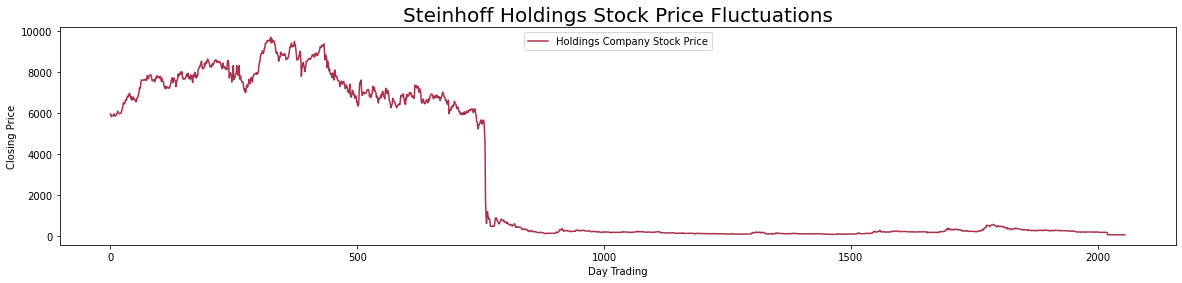

In [3]:
plt.figure(figsize=(20,4))
plt.plot(stein['Close'],c='#aa314d',label='Holdings Company Stock Price')
plt.title('Steinhoff Holdings Stock Price Fluctuations',size=20)
plt.ylabel('Closing Price')
plt.xlabel('Day Trading')
plt.legend(loc='upper center')

The x-axis uses the default dataframe indeces and not the date feature as an index, fix the index column and then compare Steinhoff to other large South African retail companies, Shoprite, Mr Price.

In [4]:
stein['Date'] = pd.to_datetime(stein['Date'],format='%Y-%m-%d')
stein.set_index('Date',inplace=True)
stein = stein.asfreq('b')


shop['Date'] = pd.to_datetime(shop['Date'],format='%Y-%m-%d')
shop.set_index('Date',inplace=True)
shop = shop.asfreq('b')

mrp['Date'] = pd.to_datetime(mrp['Date'],format='%Y-%m-%d')
mrp.set_index('Date',inplace=True)
mrp = mrp.asfreq('b')


stein['Volume Norm'] = MinMaxScaler().fit_transform(np.array(stein['Volume']).reshape(-1,1))

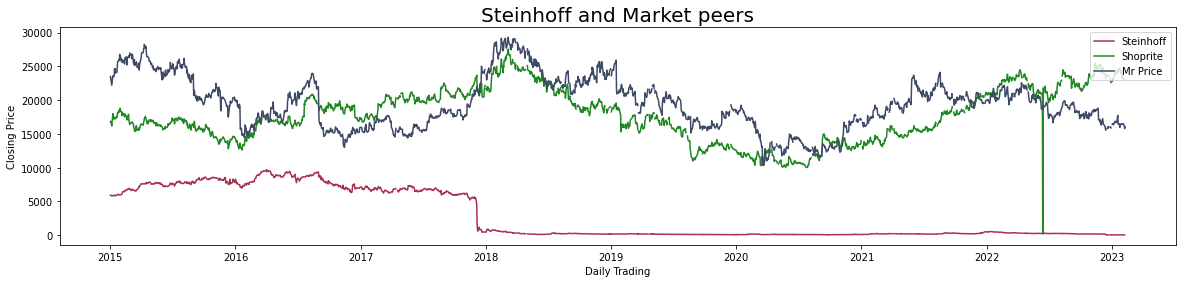

In [5]:
plt.figure(figsize=(20,4))
plt.plot(stein['Close'],c='#aa314d',label='Steinhoff')
plt.plot(shop['Close'],c='#208723',label='Shoprite')
plt.plot(mrp['Close'],c='#3e4a66',label='Mr Price')
plt.title('Steinhoff and Market peers',size=20)
plt.ylabel('Closing Price')
plt.xlabel('Daily Trading')
plt.legend(loc='upper right')

The share prices of Shoprite and Mr Price before the scandal, seem to have similar movements most of the time, meanwhile Steinhoff share price movement was opposite, although, more subtle and not as dramatic as the other companies.
<br>The other companies will be used for share price comparison, their relevance ends there.

In [6]:
stein['2015':'2016-11'].describe()

,Open,High,Low,Close,Adj Close,Volume,Volume Norm
count,500.000000,500.00000,500.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,7922.814000,8007.88600,7827.248000,7914.624000,7581.297952,9.241240e+06,0.029384
std,864.068282,867.36459,854.655572,862.942577,863.695727,6.524907e+06,0.020747
min,5818.000000,5868.00000,5760.000000,5815.000000,5506.033203,0.000000e+00,0.000000
25%,7468.000000,7572.50000,7385.500000,7484.250000,7153.645386,5.704573e+06,0.018139
50%,7852.500000,7939.50000,7751.000000,7850.500000,7508.421387,7.855677e+06,0.024978
75%,8552.750000,8640.00000,8473.500000,8552.500000,8223.049805,1.088923e+07,0.034624
max,9602.000000,9700.00000,9536.000000,9685.000000,9352.934570,6.908458e+07,0.219665


Steinhoff share price seems to have always had a volatile characteristic to it, with its highest price at R9700 and its lowest at R5760, that is a high variance and percentage change of about 40.6%. Let us see price movement closely months before and after the scandal.

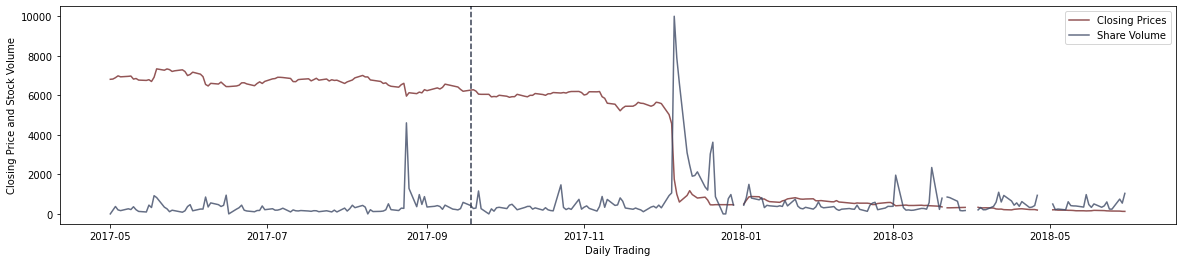

In [7]:
startdate = '2017-05-01'
enddate = '2018-05-30'


plt.figure(figsize=(20,4))
plt.plot(stein['Close'][startdate:enddate],label='Closing Prices',c='#874344',alpha=0.9)
plt.plot(stein['Volume Norm'][startdate:enddate].mul(10000),label='Share Volume',c='#3e4a66',alpha=0.8)
plt.ylabel('Closing Price and Stock Volume')
plt.xlabel('Daily Trading')
plt.axvline(dt.datetime(2017,9, 18),ls='--',c='#373e51')
plt.legend()

In <a href='https://www.businesslive.co.za/bd/companies/2017-09-19-steinhoff-international-denies-wrongdoing-in-audited-accounts-row/'>September 2017</a>, Steinhoff had a allegations leveled against them that they did not account for their joint-venture in their books in 2016. We could see the dent and the gradual rise that follows, in the stock price after the emergence of the news, which indicates confidence in the company. <br>This happened only 4 months before the scandal, it is safe to claim that many, if not most, people were blindsided by the emergence of new of irregularities in their books.

In [8]:
stein['2017-01':'2017-11'].describe()

,Open,High,Low,Close,Adj Close,Volume,Volume Norm
count,235.000000,235.000000,235.000000,235.000000,235.000000,2.350000e+02,235.000000
mean,6552.361702,6618.825532,6458.157447,6538.306383,6528.954108,1.108520e+07,0.035247
std,441.654999,447.904388,445.776760,444.078956,437.774712,1.138361e+07,0.036196
min,5250.000000,5375.000000,5143.000000,5217.000000,5217.000000,0.000000e+00,0.000000
25%,6255.000000,6305.000000,6182.500000,6242.500000,6224.500000,5.853018e+06,0.018611
50%,6640.000000,6708.000000,6550.000000,6630.000000,6630.000000,8.467303e+06,0.026923
75%,6845.000000,6917.000000,6755.500000,6851.500000,6842.750733,1.337644e+07,0.042532
max,7370.000000,7401.000000,7247.000000,7338.000000,7338.000000,1.448915e+08,0.460704


2017, the year the share price fell off a cliff, experienced relative stability. It is undeniable that the price changes were relatively steep, ranging from R5143 to R7401. The standard deviation of the closing price, which is around R444 provided relative stability compared to deviation of R867 in the two years prior to the scandal.

There missing values in Steinhoff series in our period of interest, since the price is relatively stable, filling the null values with the mean is a good choice.

In [9]:
mrp['Close']['2017-01-01':'2017-11-30'].fillna(mrp['Close']['2017-01-01':'2017-11-30'].mean(),inplace=True)
shop['Close']['2017-01-01':'2017-11-30'].fillna(shop['Close']['2017-01-01':'2017-11-30'].mean(),inplace=True)
stein['Close']['2017-01-01':'2017-11-30'].fillna(stein['Close']['2017-01-01':'2017-11-30'].mean(),inplace=True)

<h3><u>Statistical Analysis</u> of the year before the share price plummeted.<h/3>

In [10]:
del stein['High'],stein['Low'],stein['Open'],stein['Adj Close']
del shop['High'],shop['Low'],shop['Open'],shop['Adj Close'],mrp['High'],mrp['Low'],mrp['Open'],mrp['Adj Close']

<u>Steinhoff Moving Averages</u> per lags.

In [11]:
def ma_graph(df_col, lags):

    mov_avg = df_col.rolling(lags).mean()
    
    plt.figure(figsize=(20,4))
    plt.title('Moving Average\n Lags:{}'.format(lags))
    plt.plot(df_col[lags:], label='Actual Prices',c='#aa314d')
    plt.plot(mov_avg, 'g', label='Moving Average Trend',c='#3e4a66')
    plt.xlabel('Daily Trading')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()

<ipython-input-11-5a7a2467476f>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(mov_avg, 'g', label='Moving Average Trend',c='#3e4a66')


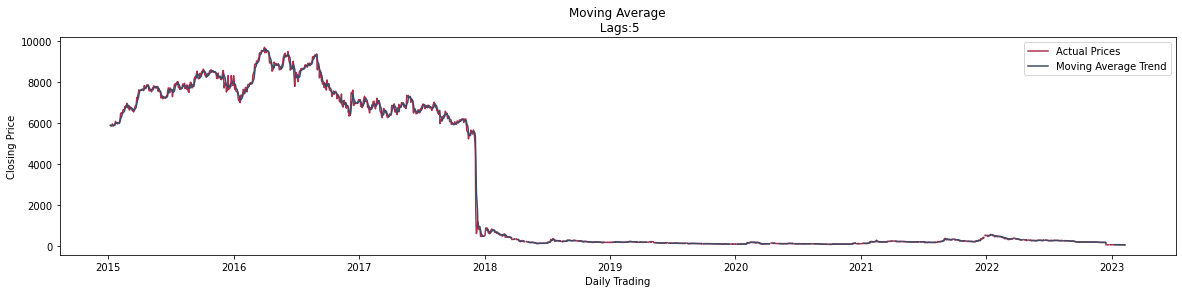

In [12]:
ma_graph(stein['Close'],5)

There is very little difference in the trend and closing prices using 5 day window. Let us change the lags and see the trend towards the decline.

<ipython-input-11-5a7a2467476f>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(mov_avg, 'g', label='Moving Average Trend',c='#3e4a66')


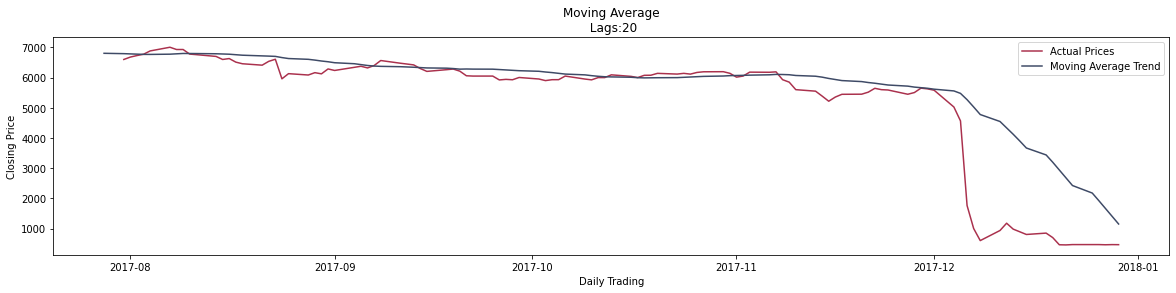

In [13]:
ma_graph(stein['Close']['2017-07':'2017-12'],20)

<ipython-input-11-5a7a2467476f>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(mov_avg, 'g', label='Moving Average Trend',c='#3e4a66')


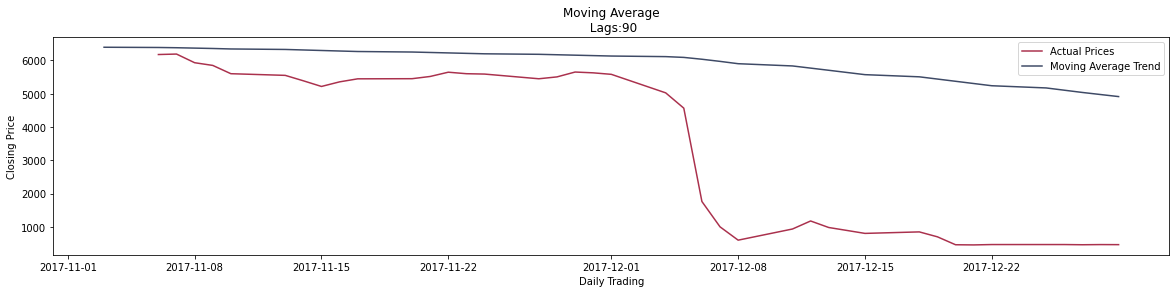

In [14]:
ma_graph(stein['Close']['2017-07':'2017-12'],90)

The use of higher windows with the moving averages is key to seeing the trend and overall shape of the share price, but we sacrifice accuracy.

Proper test for <b><u>seasonality and trend</u></b>.

Examination the nature of the share price with statistical means, not only with a visual test.

In [15]:
stein_dec = seasonal_decompose(stein['Close']['2017-01-01':'2017-11-30'],model='additive')

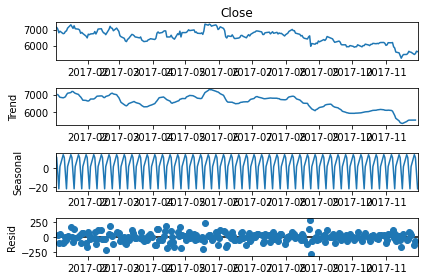

In [16]:
stein_dec.plot()

plt.show()

The stability of the price movememnt provides no clear long-term movement. The trend appears cyclical, and also the price movement, with the default period argument. There is more seasonality than I initially thought and the residuals are consistent with the standard deviation of R444. Let me alter the period to 20 and observe the changes.

In [17]:
stein_dec2 = seasonal_decompose(stein['Close']['2017-01-01':'2017-11-30'],model='additive',period=20)

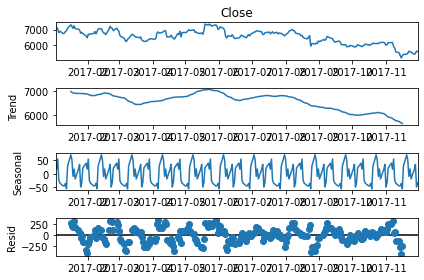

In [18]:
stein_dec2.plot()
plt.show()

Residuals expectedly persist, seasonality is less pronounced and the trend now resembles the 20-window moving averages analysis we had done. The higher time period give a better overview about the share price but we also lose accuracy when it comes to modeling the price movement.


Here is the important but now-redundant, <b><u>Augmented Dickey-Fuller Test</u></b> with AIC as information criteria, to test for stationarity before we choose an appropriate statistical model to predict the prices before the decline. Our significance level will be 5% throughout this project.

In [19]:
raw_prices = adfuller(stein['Close']['2017-01-01':'2017-11-30'], autolag='AIC')

In [20]:
raw_prices

(-1.9076356542773651,
 0.3284776280879866,
 0,
 238,
 {'1%': -3.458128284586202,
  '5%': -2.873761835239286,
  '10%': -2.5732834559706235},
 2781.0597216125943)

The p-Value is 32.8%, and the test statistic is higher than our critical value. The null hypothesis is not rejected, there is now conclusive evidence that the series of prices a year before the decline is non-stationary.

<br>Now it is time to induce stationarity.

In [21]:
stein['Returns'] = stein['Close'].pct_change(1).mul(100)
shop['Returns'] = shop['Close'].pct_change(1).mul(100)
mrp['Returns'] = mrp['Close'].pct_change(1).mul(100)

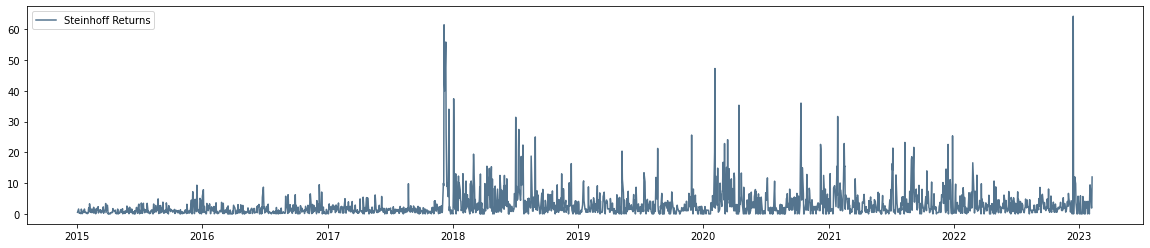

In [22]:
plt.figure(figsize=(20,4))
plt.plot(stein['Returns'].abs(),label='Steinhoff Returns',c='#54748e')
plt.legend()

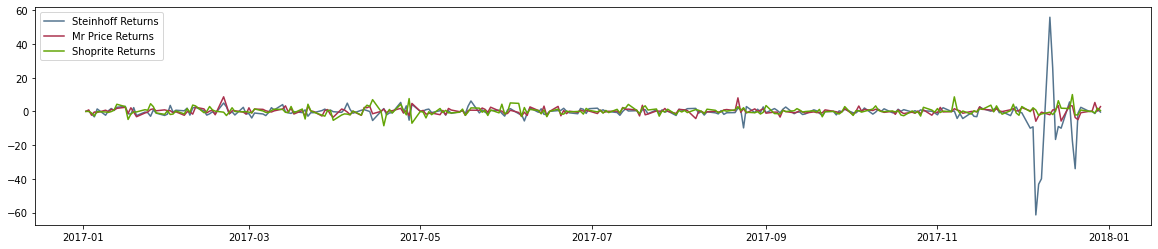

In [23]:
plt.figure(figsize=(20,4))
plt.plot(stein['Returns']['2017'],label='Steinhoff Returns',c='#54748e')
plt.plot(shop['Returns']['2017'],c='#aa314d',label='Mr Price Returns')
plt.plot(mrp['Returns']['2017'],c='#63a506',label='Shoprite Returns')
plt.legend()

Now follows the price returns comparison to the scaled stock volume.

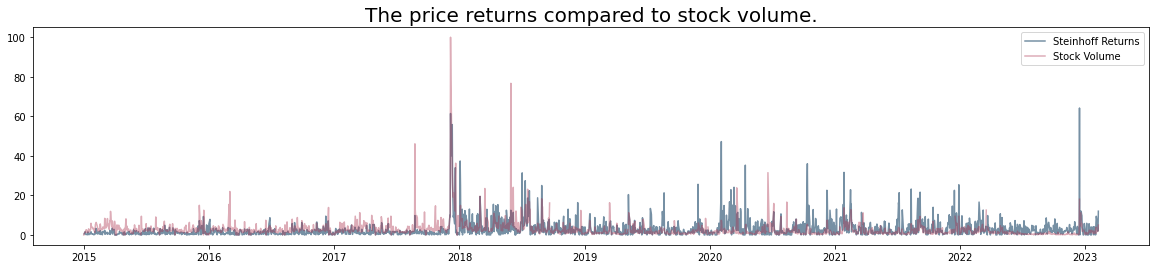

In [24]:
plt.figure(figsize=(20,4))
plt.plot(stein['Returns'].abs(),label='Steinhoff Returns',c='#54748e',alpha=0.8)
plt.plot(stein['Volume Norm'].mul(100),label='Stock Volume',c='#aa314d',alpha=0.4)
plt.title('The price returns compared to stock volume.',size=20)
plt.legend()

The returns reflect what happens in the stock market when there is turbulence. The ADF test with AIC as information criteria.

In [25]:
ret_stein = adfuller(stein['Returns']['2017-01-03':'2017-11-30'], autolag='AIC')

In [26]:
ret_stein

(-15.928486661958729,
 7.778104330530277e-29,
 0,
 237,
 {'1%': -3.4582467982399105,
  '5%': -2.8738137461081323,
  '10%': -2.5733111490323846},
 915.0719320137068)

The claim of stability of the price a year before the decline, as assessed before, is now fully corroborated. The p-Value = 0%, we will reject the null hypothesis. The differenced prices are stationary.

Stationarity confirmed. Integration is necessary only once.
<br>Next, the <u><b>ACF and PACF tests</b></u> to determine the lags to use for MA(q) and AR(p) components, respectively.

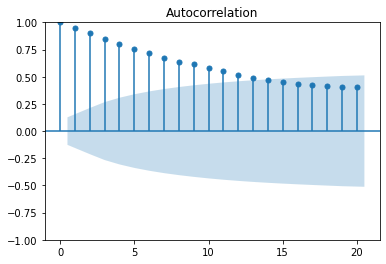

In [27]:
plot_acf(stein['Close']['2017-01-01':'2017-11-30'], lags=20,alpha=0.05)
plt.show()

The significance decreases as time passes suggests trend, which appeared downward spiraling with a changing mean, this was observed with the rolling mean analysis.

/home/slyson/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


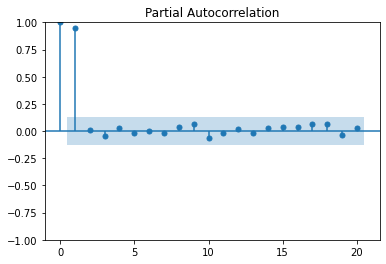

In [28]:
plot_pacf(stein['Close']['2017-01-01':'2017-11-30'], lags=20,alpha=0.05)
plt.show()

The first two lags are positive and significant. The other lags are not significant because the volatility of the price two periods before does not affect the current price.

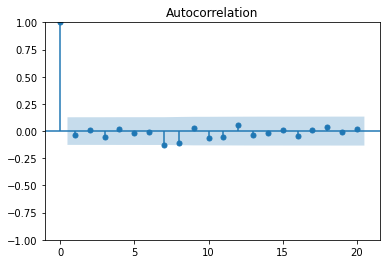

In [29]:
plot_acf(stein['Returns']['2017-01-03':'2017-11-30'], lags=20,alpha=0.05)
plt.show()

Only the value in the first lag is signficant.

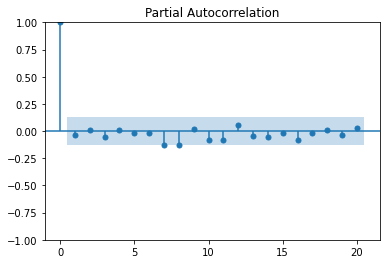

In [30]:
plot_pacf(stein['Returns']['2017-01-03':'2017-11-30'], lags=20,alpha=0.05,method='ols')
plt.show()

The two plots are similar. The current residual is explained by the residual 1 lag ago, the 8th and 9th lags will be ignored as they are not significant enough.

<h3><u>Model Fitting.</u></h3>

The componenets observed so far are AR(1),MA(1).<br>My naivety leans me towards <b>ARIMA</b>(1,0,1) with returns and I will therefore use it to try and model the share price leading to the decline.


The training cutoff will be a week before the 30th.

In [31]:
tr_start_date = '2017-01-03'
tr_end_date = '2017-11-22'

ts_start_date = '2017-11-23'
ts_end_date = '2017-11-30'

stein_tr,stein_ts = stein[tr_start_date:tr_end_date],stein[ts_start_date:ts_end_date]

Use the actual prices first.

In [32]:
model_res_ap = ARIMA(stein_tr['Close'],order=(1,1,1))
fit_ap = model_res_ap.fit()

In [33]:
fit_ap.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  232
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1442.918
Date:                Tue, 14 Feb 2023   AIC                           2891.837
Time:                        10:54:23   BIC                           2902.164
Sample:                    01-03-2017   HQIC                          2896.002
                         - 11-22-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9806      0.059    -16.529      0.000      -1.097      -0.864
ma.L1          0.9660      0.081     11.919      0.000       0.807       1.125
sigma2      1.558e+04    898.282     17.344      0.000    1.38e+04    1.73e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               130.11
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.44
Prob(H) (two-sided):                  0.25   Kurtosis:                         6.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

As expected, the ACF and PACF plots are supported by the model coefficients. Although in this particular case, we did apply integration, so the results of the fitted model are not surprising. The model results variable will now be used to try and forecast the prices.

In [34]:
results_ap = fit_ap.predict(start=ts_start_date,end=ts_end_date)

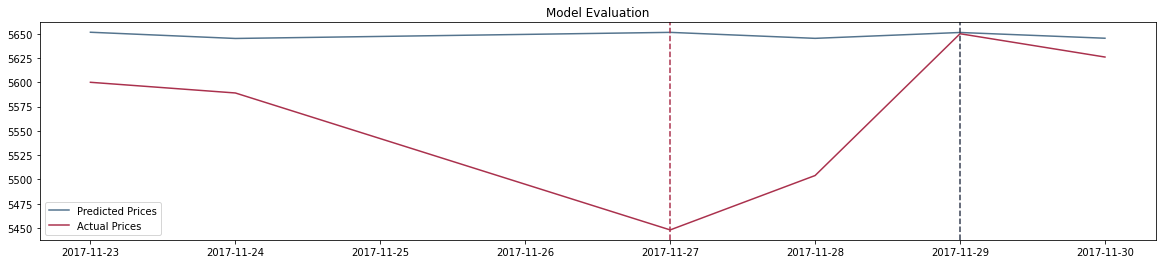

In [35]:
plt.figure(figsize=(20,4))
plt.plot(results_ap[ts_start_date:ts_end_date],c='#54748e',label='Predicted Prices')
plt.plot(stein['Close'][ts_start_date:ts_end_date],c='#aa314d',label='Actual Prices')
plt.axvline(dt.datetime(2017,11,27),ls='--',c='#aa314d')
plt.axvline(dt.datetime(2017,11,29),ls='--',c='#373e51')
plt.title('Model Evaluation')
plt.legend()
plt.show()

The predictions are very inaccurate. I would be receiving a written warning for my below-standard work because that is a lot of money lost, even if the stock ownership is only one share. The model is accurate once on the 29th, the actual price is R5650 and the predction is R5651.287, only 0.0228% off. The most innacurate prediction is on the 27th, that is 3.599% inaccurate.

It appears the model predicts values centred around the mean, that is the nature of the single lag model and the use of returns might return better results.

In [36]:
model_ret = ARIMA(stein_tr['Returns'],order=(1,0,1))
fit_ret = model_ret.fit()

In [37]:
fit_ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Returns   No. Observations:                  232
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -475.981
Date:                Tue, 14 Feb 2023   AIC                            959.962
Time:                        10:54:25   BIC                            973.749
Sample:                    01-03-2017   HQIC                           965.522
                         - 11-22-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0819      0.126     -0.651      0.515      -0.329       0.165
ar.L1         -0.9815      0.054    -18.247      0.000      -1.087      -0.876
ma.L1          0.9661      0.076     12.791      0.000       0.818       1.114
sigma2         3.5431      0.209     16.949      0.000       3.133       3.953
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               121.98
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.43
Prob(H) (two-sided):                  0.66   Kurtosis:                         6.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The significant coefficients from the ACF and PACF are confirmed by the model, hopefully the model performs better this time around.

In [38]:
results_ret = fit_ret.predict(start=ts_start_date,end=ts_end_date)

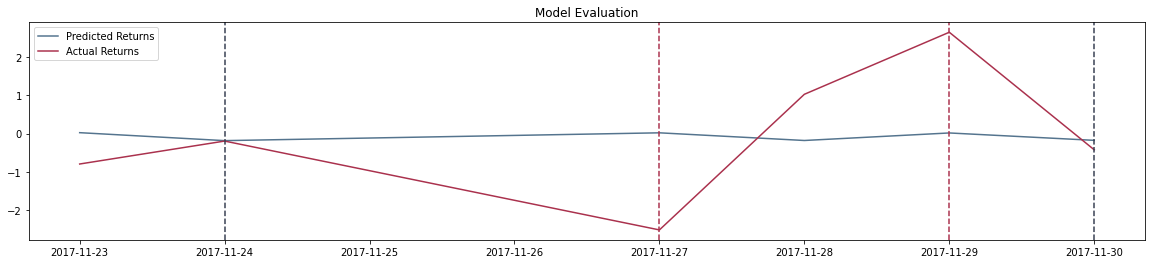

In [39]:
plt.figure(figsize=(20,4))
plt.plot(results_ret[ts_start_date:ts_end_date],c='#54748e',label='Predicted Returns')
plt.plot(stein['Returns'][ts_start_date:ts_end_date],c='#aa314d',label='Actual Returns')
plt.axvline(dt.datetime(2017,11,27),ls='--',c='#aa314d')
plt.axvline(dt.datetime(2017,11,29),ls='--',c='#aa314d')
plt.axvline(dt.datetime(2017,11,24),ls='--',c='#373e51')
plt.axvline(dt.datetime(2017,11,30),ls='--',c='#373e51')
plt.title('Model Evaluation')
plt.legend()
plt.show()

The model again predicts values centred around the mean with some residuals. It is correct just twice and that is only because the returns move towards the predicted mean.

In [40]:
fit_ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Returns   No. Observations:                  232
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -475.981
Date:                Tue, 14 Feb 2023   AIC                            959.962
Time:                        10:54:26   BIC                            973.749
Sample:                    01-03-2017   HQIC                           965.522
                         - 11-22-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0819      0.126     -0.651      0.515      -0.329       0.165
ar.L1         -0.9815      0.054    -18.247      0.000      -1.087      -0.876
ma.L1          0.9661      0.076     12.791      0.000       0.818       1.114
sigma2         3.5431      0.209     16.949      0.000       3.133       3.953
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               121.98
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.43
Prob(H) (two-sided):                  0.66   Kurtosis:                         6.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
r2_score(stein['Returns'][ts_start_date:ts_end_date],results_ret)

-0.020400950679180463

This is abysmal.

In [42]:
mean_squared_error(stein['Returns'][ts_start_date:ts_end_date],results_ret)

2.6021423348671724

An average of 2.6% returns inaccuracy for a stock price prediction model is unusable.


It would be a laborious exercise to alter the order arguments of the model to predict the values accurately. The model <b>auto_arima()</b> would be of great help, there would be no need to change arguments manually.

In [43]:
model_rets_ar = auto_arima(stein_tr['Returns'][tr_start_date:tr_end_date], max_p=7, max_q=7, max_P=7, max_Q=7,m=7)

In [44]:
ret_pred_ar = pd.DataFrame(model_rets_ar.predict(n_periods=len(stein_ts['Returns'][ts_start_date:ts_end_date])),index=stein_ts[ts_start_date:ts_end_date].index)

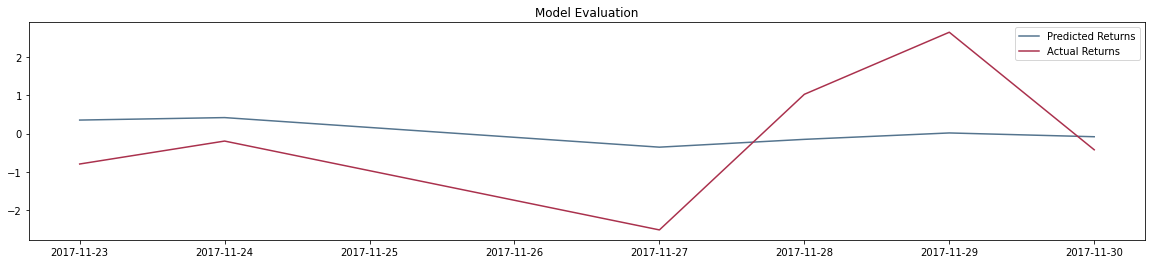

In [45]:
plt.figure(figsize=(20,4))
plt.plot(ret_pred_ar,c='#54748e',label='Predicted Returns')
plt.plot(stein['Returns'][ts_start_date:ts_end_date],c='#aa314d',label='Actual Returns')
plt.title('Model Evaluation')
plt.legend()
plt.show()

The fitted model does well to predict the movement of the prices, but still not satisfactory, the predicted values revolve around the mean, the model would definetely do a bad job predicting the decline. There is a business intelligence need to use some factors as exogenous variables, perhaps the model could be more accurate, as for now, using share prices from other companies that do not correlate with Steinhoff would distort our model.


This is the end of the project. Corrections and suggestions are alwasy welcome.

MS Legodi.